In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from matplotlib import pyplot as plt 

import feather
import sys
import warnings
warnings.filterwarnings("ignore")

import gc

In [11]:
df = pd.read_csv("DataCoSupplyChainDataset.csv",header= 0,encoding='unicode_escape')

pd.set_option("display.max_rows", None, "display.max_columns", None)

df.iloc[1,:]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
76,PAYMENT,4,2,42.740002,170.970001,Late delivery,1,17,Cleats,Caguas,Puerto Rico,XXXXXXXXX,Mary,8831,Smith,XXXXXXXXX,Home Office,PR,8165 Red Lane,725.0,4,Apparel,18.287464,-66.370544,LATAM,David,Panamá,8831,5/5/2017 14:23,58613,365,9.000000,0.05,146701,59.990002,0.25,3,179.970001,170.970001,42.740002,Central America,Chiriquí,PENDING_PAYMENT,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,5/9/2017 14:23,Second Class
77,PAYMENT,5,2,49.320000,170.070007,Late delivery,1,17,Cleats,Caguas,Puerto Rico,XXXXXXXXX,Mary,10679,Smith,XXXXXXXXX,Home Office,PR,331 Grand Orchard,725.0,4,Apparel,18.291080,-66.370506,LATAM,Santo Domingo,República Dominicana,10679,4/25/2015 4:44,7824,365,9.900000,0.06,19564,59.990002,0.29,3,179.970001,170.070007,49.320000,Caribbean,Santo Domingo,PENDING_PAYMENT,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,4/30/2015 4:44,Second Class
78,PAYMENT,5,2,80.339996,167.369995,Late delivery,1,17,Cleats,Caguas,Puerto Rico,XXXXXXXXX,Mary,5007,Smith,XXXXXXXXX,Home Office,PR,2264 Thunder Abbey,725.0,4,Apparel,18.249846,-66.370506,LATAM,Cabimas,Venezuela,5007,4/25/2015 1:14,7814,365,12.600000,0.07,19544,59.990002,0.48,3,179.970001,167.369995,80.339996,South America,Zulia,PENDING_PAYMENT,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,4/30/2015 1:14,Second Class
79,PAYMENT,5,2,-26.690001,163.770004,Late delivery,1,17,Cleats,Caguas,Puerto Rico,XXXXXXXXX,Mary,5007,Smith,XXXXXXXXX,Home Office,PR,2264 Thunder Abbey,725.0,4,Apparel,18.249846,-66.370506,LATAM,Cabimas,Venezuela,5007,4/25/2015 1:14,7814,365,16.200001,0.09,19542,59.990002,-0.16,3,179.970001,163.770004,-26.690001,South America,Zulia,PENDING_PAYMENT,NaN,365,17,NaN,http://images.acmesports.sports/Perfect+Fitnes...,Perfect Fitness Perfect Rip Deck,59.990002,0,4/30/2015 1:14,Second Class


In [14]:
print('Unique values of customer city', len(df['Customer City'].unique()))
print('Unique values of order city', len(df['Order City'].unique()))

Unique values of customer city 563
Unique values of order city 3597


## NaN ratio

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print(missing_data)

                                Total   Percent
Product Description            180519  1.000000
Order Zipcode                  155679  0.862397
fullname                            8  0.000044
Customer Lname                      8  0.000044
Customer Zipcode                    3  0.000017
Customer Fname                      0  0.000000
Longitude                           0  0.000000
Latitude                            0  0.000000
Department Name                     0  0.000000
Department Id                       0  0.000000
Customer Street                     0  0.000000
Customer State                      0  0.000000
Customer Segment                    0  0.000000
Customer Password                   0  0.000000
Customer Id                         0  0.000000
Customer Email                      0  0.000000
Order City                          0  0.000000
Customer Country                    0  0.000000
Customer City                       0  0.000000
Category Name                       0  0

## Create year, month, day, and hour feature

In [33]:
df['order date (DateOrders)'] = df['order date (DateOrders)'].astype(str)

df[['order_month','order_date','order_year']] = df['order date (DateOrders)'].str.split('/', expand=True)

df[['order_year','order_hour']] = df['order_year'].str.split(' ', expand=True)

df['order_hour'] = df['order_hour'].str.replace(r':\d+', '')

df.drop(['Product Description','Delivery Status', 'Days for shipping (real)', 'Order Status', 'shipping date (DateOrders)','Order Zipcode','order date (DateOrders)'], axis=1, inplace=True)
df.dropna(axis=0, inplace=True)


## Change data type for some columns

In [ ]:
df[['Order Customer Id', 'Order Id','Product Category Id','Product Status','Product Card Id']] = df[['Order Customer Id', 'Order Id','Product Category Id','Product Status','Product Card Id']].astype(int)
df[['Order Profit Per Order', 'Product Price']] = df[['Order Customer Id', 'Product Price']].astype(float)


## Label encode categorical variables

In [34]:
categories = df.select_dtypes(include='object').columns.values

print(categories)

for col in categories:
    print(col)
    label_encoder = LabelEncoder()
    df.loc[:, col] = label_encoder.fit_transform(df.loc[:, col])
    

['Type' 'Category Name' 'Customer City' 'Customer Country'
 'Customer Email' 'Customer Fname' 'Customer Lname' 'Customer Password'
 'Customer Segment' 'Customer State' 'Customer Street' 'Department Name'
 'Market' 'Order City' 'Order Country' 'Order Region' 'Order State'
 'Product Image' 'Product Name' 'Shipping Mode' 'order_month' 'order_date'
 'order_year' 'order_hour']
Type
Category Name
Customer City
Customer Country
Customer Email
Customer Fname
Customer Lname
Customer Password
Customer Segment
Customer State
Customer Street
Department Name
Market
Order City
Order Country
Order Region
Order State
Product Image
Product Name
Shipping Mode
order_month
order_date
order_year
order_hour


## Drop useless features and use first 30000 data for the model

Note: We only use first 30000 data because SHAP takes forever. For prediction purposes, we use all data.

In [38]:
df = df[:30000]

df.drop(['Department Name',
       'Order Item Discount Rate', 'Product Image', 'Market', 'Category Id',
       'Order Item Quantity', 'Order Item Product Price', 'Customer Segment',
       'Category Name', 'Shipping Mode', 'Order Item Id', 'Sales',
       'Department Id', 'Order Item Cardprod Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status', 'Product Card Id',
       'Order Profit Per Order', 'Order Item Total', 'Order Customer Id',
       'Customer Password', 'Customer Email', 'Customer Country',
       'order_year'], axis=1, inplace=True)

## LightGBM

train_X:  (30000, 23)
train_y:  (30000,)

 fold 0
train_idx:  24000
val_idx:  6000
Training until validation scores don't improve for 500 rounds.
[1000]	training's binary_logloss: 0.063216	valid_1's binary_logloss: 0.518247
Early stopping, best iteration is:
[570]	training's binary_logloss: 0.136036	valid_1's binary_logloss: 0.506482

 fold 1
train_idx:  24000
val_idx:  6000
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[457]	training's binary_logloss: 0.174153	valid_1's binary_logloss: 0.509081

 fold 2
train_idx:  24000
val_idx:  6000
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[497]	training's binary_logloss: 0.166605	valid_1's binary_logloss: 0.488515

 fold 3
train_idx:  24000
val_idx:  6000
Training until validation scores don't improve for 500 rounds.
Early stopping, best iteration is:
[441]	training's binary_logloss: 0.183766	valid_1's binary_logloss: 0.482844

 fold 4
trai

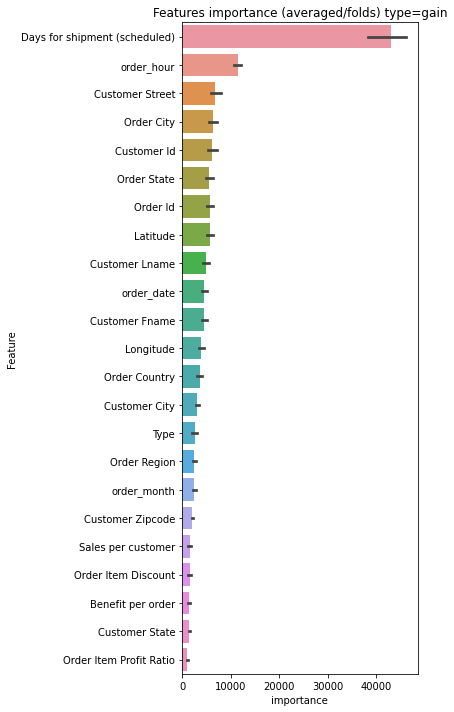

In [39]:
import lightgbm as lgb
from scipy import stats
from tqdm import tqdm_notebook
from sklearn.model_selection import KFold
from statistics import mean
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Fix seeds
from numpy.random import seed
seed(0)

np.set_printoptions(suppress=True)

        
train_y = df['Late_delivery_risk']
train_X = df.drop(['Late_delivery_risk'], axis=1)

# test_packetid = test['id']

# test_X = test.drop(['attackid','packetid','id'], axis=1)

metric = 'binary_logloss'

params = {
		  'objective': 'binary',
		  "metric": metric,
		 }


folds = KFold(n_splits=5)

# Out of fold predictions
oof = np.zeros(shape=(len(train_X),))

# Predictions for test data
# predictions = np.zeros(shape=(len(test_X),5))
feature_importance_df = pd.DataFrame()

print('train_X: ',train_X.shape)
print('train_y: ',train_y.shape)

loss = list()

#run model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(train_X,train_y)):
	strLog = "\n fold {}".format(fold_)
	print(strLog)

# 	Output the size of train and validation index
	print('train_idx: ',len(trn_idx))
	print('val_idx: ',len(val_idx))

	X_tr, X_val = train_X.iloc[trn_idx], train_X.iloc[val_idx]
	y_tr, y_val = train_y.iloc[trn_idx], train_y.iloc[val_idx]
   
	model = lgb.LGBMClassifier(**params, n_estimators=5000, importance_type='gain', n_jobs=-1)

	model.fit(X_tr,
			  y_tr,
			  eval_set=[(X_tr,y_tr),(X_val, y_val)],
			  verbose=1000,
			  early_stopping_rounds=500)

	# Out of fold predictions
	oof[val_idx] = model.predict(X_val, num_iteration=model.best_iteration_)

	# Test prediction
# 	predictions += (model.predict_proba(test_X, num_iteration=model.best_iteration_)) / folds.n_splits

	loss.append(model.best_score_['valid_1'][metric])

	#Feature importance
	fold_importance_df = pd.DataFrame()
	fold_importance_df["Feature"] = train_X.columns.values
	fold_importance_df["importance"] = model.feature_importances_[:len(train_X.columns.values)]
	fold_importance_df["fold"] = fold_ + 1
	feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

print('Mean log loss = ',mean(loss))

print()
print('Mean accuracy score = {}'.format(accuracy_score(train_y.values, oof)))


print('[' + str(len(train_X.columns.values))+']')
print(train_X.columns.values)

cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False).index)

print(cols)

best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(6,10))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds) type=gain')
plt.tight_layout()

plt.savefig('./importance.png')
plt.show()



## SHAP values

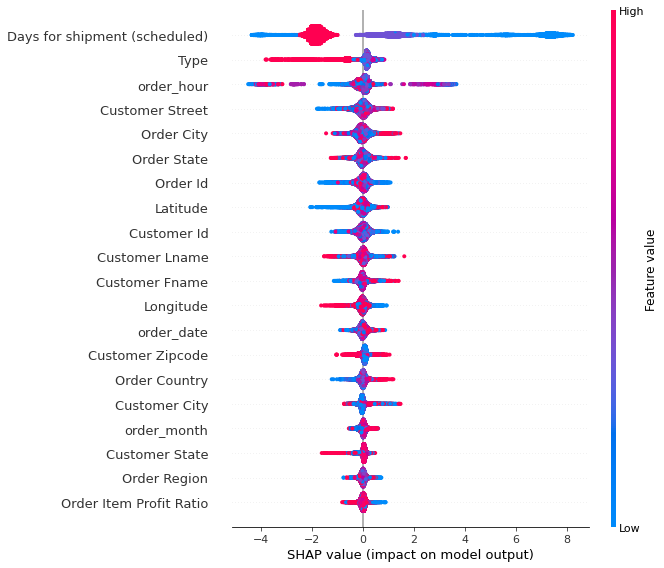

In [40]:
%matplotlib inline
import shap
shap.initjs()


explainer = shap.TreeExplainer(model, data=X_tr, feature_dependence="tree_path_dependent")

X_tr_shap_values = explainer.shap_values(X_tr)


shap.summary_plot(shap_values=X_tr_shap_values,
                  features=X_tr,
                  feature_names=X_tr.columns)


## Dependence plot

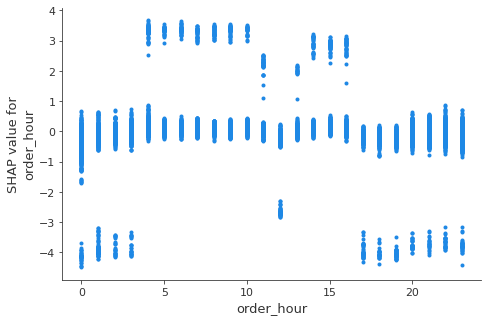

In [46]:
shap.dependence_plot(ind='order_hour',
                     interaction_index=None,
                     shap_values=X_tr_shap_values,
                     features=X_tr,
                     feature_names=X_tr.columns)

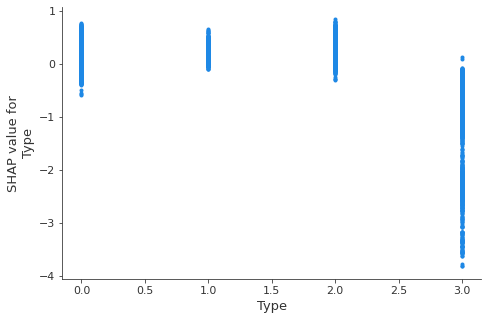

In [47]:
shap.dependence_plot(ind='Type',
                     interaction_index=None,
                     shap_values=X_tr_shap_values,
                     features=X_tr,
                     feature_names=X_tr.columns)

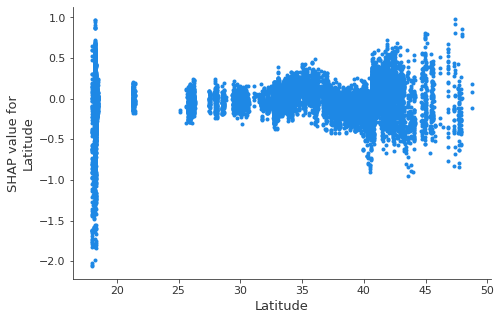

In [51]:
shap.dependence_plot(ind='Latitude',
                     interaction_index=None,
                     shap_values=X_tr_shap_values,
                     features=X_tr,
                     feature_names=X_tr.columns)